In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

    
import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-traffic-accidents/RTA Dataset.csv
/kaggle/input/road-traffic-accidents/cleaned.csv


In [2]:
df = pd.read_csv('/kaggle/input/road-traffic-accidents/RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df.shape

(12316, 32)

In [6]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [10]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [11]:
df[['Accident_severity']].value_counts()

Accident_severity
Slight Injury        10415
Serious Injury        1743
Fatal injury           158
dtype: int64

In [12]:
cat_cols = df.select_dtypes(include=object).columns.tolist()

In [13]:
for i in cat_cols:
    print(i)
    print(df[i].unique())
    print(len(df[i].unique()))

#df['Time']

Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
1074
Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
7
Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
5
Sex_of_driver
['Male' 'Female' 'Unknown']
3
Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
8
Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']
5
Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
8
Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
18
Owner_of_vehicle
['Owner' 'Governmental' nan 'Organization' 'Other']
5
Service_year_of_vehicle
['Above 10yr' '5-10yrs' nan '1-2yr'

In [14]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
#for i in cat_cols:
#    sns.barplot(x=df[i].value_counts().index,
#                y=df[i].value_counts().values)
#    plt.show()

In [15]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
correlation_matrix

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


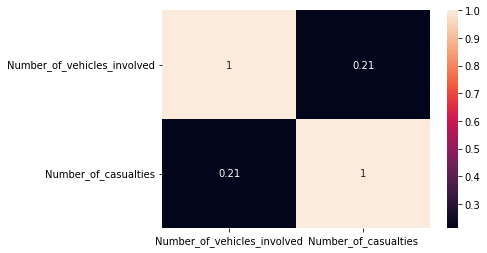

In [16]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [17]:
X=df.iloc[:, [2, 6, 7, 10]].values
Y=df.iloc[:, 31].values

In [18]:
col_to_remove = ['Defect_of_vehicle', 'Fitness_of_casuality', 'Work_of_casuality', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Service_year_of_vehicle']
df_after_col_drop = df.drop(columns=col_to_remove)

In [19]:
df_normalize = df_after_col_drop.replace({'Driving_experience': {"unknown": "Unknown"}})
df_no_NAN = df_normalize.fillna("Unknown")
#df_no_NAN = df_no_NAN.replace("Unknown", method='ffill')
df_no = df_no_NAN.replace("Unknown", df_no_NAN.mode().iloc[0])
df_no['Driving_experience'].value_counts()

5-10yr        4225
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
Name: Driving_experience, dtype: int64

In [20]:
df_no.isnull().sum()
df_no

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Daylight,Normal,Collision with roadside objects,2,2,Going straight,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [21]:
def formatTimeCol(t):
    t = t[:2]
    if ":" in t:
        t = t[:1]
        
    return int(t)

def categorizeTimeCol(t):
    if t >= 7 and t < 19:
        return "Day"
    else:
        return "Night"


df_no['Time'] = df_no['Time'].apply(lambda x: formatTimeCol(x))
#df_no_NAN['Time'].value_counts()
df_no['Time'] = df_no['Time'].apply(lambda x: categorizeTimeCol(x))
#df_no_NAN['Time'].value_counts(dropna=False)

In [22]:
df_no
df_no['Day_of_week'].value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

In [23]:
new_df = df_no.copy()
new_df['Sex_of_driver']=new_df['Sex_of_driver'].map({'Female':0, 'Male':1})
new_df['Time'] = new_df['Time'].map({'Day': 0, 'Night': 1})
new_df['Age_band_of_driver'] = new_df['Age_band_of_driver'].map({'Under 18': 0, '18-30': 1,'31-50': 1, 'Over 51': 3})
new_df['Day_of_week'] = new_df['Day_of_week'].map({'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 1, 'Sunday': 1})
new_df['Educational_level'] = new_df['Educational_level'].map({'Elementary school': 0, 'Junior high school': 1, 'High school': 1, 'Above high school': 2, 'Writing & reading': 2, 'Illiterate': 3})
#new_df['Vehicle_driver_relation'] = new_df['Vehicle_driver_relation'].replace('Other', 'Employee')
new_df['Vehicle_driver_relation'] = new_df['Vehicle_driver_relation'].map({'Employee': 0, 'Other': 0, 'Owner': 1})
#new_df['Driving_experience'] = new_df['Driving_experience'].map({'No Licence': 0, 'Below 1yr': 1, '1-2yr': 1, '2-5yr': 2, '5-10':3, 'Above 10yr': 4})
#new_df['Type_of_vehicle'] = new_df['Type_of_vehicle'].map({'Bajaj': 0, 'Bicycle': 0, 'Motorcycle': 0, 'Ridden horse': 1, 'Special vehicle': 1, 'Turbo': 0, 'Taxi': 2, 'Automobile': 2, 'Stationwagen':2, 'Long lorry': 3, 'Lorry': 3, 'Lorry (11?40Q)': 3, 'Pick up upto 10Q': 3, 'Public (13?45 seats)': 4, 'Public (> 45 seats)': 4, 'Public (12 seats)': 4, 'Other': 5})
new_df['Owner_of_vehicle'] = new_df['Owner_of_vehicle'].map({'Owner': 0, "Governmental": 1, 'Organization': 2, 'Other': 2})
new_df['Accident_severity'] = new_df['Accident_severity'].map({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})

columns_mapped = ['Sex_of_driver', 'Time', 'Age_band_of_driver', 'Day_of_week', 'Educational_level', 'Vehicle_driver_relation', 'Owner_of_vehicle', 'Accident_severity']
mapped_df = new_df.copy()
mapped_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,0,1,1,2,0,1-2yr,Automobile,0,Residential areas,...,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,Not a Pedestrian,Moving Backward,0
1,0,0,1,1,1,0,Above 10yr,Public (> 45 seats),0,Office areas,...,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,0
2,0,0,1,1,1,0,1-2yr,Lorry (41?100Q),0,Recreational areas,...,Daylight,Normal,Collision with roadside objects,2,2,Going straight,3,Not a Pedestrian,Changing lane to the left,1
3,1,1,1,1,1,0,5-10yr,Public (> 45 seats),1,Office areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,3,Not a Pedestrian,Changing lane to the right,0
4,1,1,1,1,1,0,2-5yr,Automobile,0,Industrial areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,0,0,1,1,1,0,2-5yr,Lorry (11?40Q),0,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,Not a Pedestrian,No distancing,0
12312,0,1,1,1,0,0,5-10yr,Automobile,0,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,No distancing,0
12313,0,1,3,1,1,0,5-10yr,Bajaj,0,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,3,Not a Pedestrian,Changing lane to the right,1
12314,0,1,1,0,1,0,Above 10yr,Lorry (41?100Q),0,Office areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,Driving under the influence of drugs,0


In [24]:
#for i in list(mapped_df.columns):
#    print(mapped_df[i].value_counts())
#    print("\n ************************************* \n")
mapped_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,0,1,1,2,0,1-2yr,Automobile,0,Residential areas,...,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,Not a Pedestrian,Moving Backward,0
1,0,0,1,1,1,0,Above 10yr,Public (> 45 seats),0,Office areas,...,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,0
2,0,0,1,1,1,0,1-2yr,Lorry (41?100Q),0,Recreational areas,...,Daylight,Normal,Collision with roadside objects,2,2,Going straight,3,Not a Pedestrian,Changing lane to the left,1
3,1,1,1,1,1,0,5-10yr,Public (> 45 seats),1,Office areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,3,Not a Pedestrian,Changing lane to the right,0
4,1,1,1,1,1,0,2-5yr,Automobile,0,Industrial areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,0,0,1,1,1,0,2-5yr,Lorry (11?40Q),0,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,Not a Pedestrian,No distancing,0
12312,0,1,1,1,0,0,5-10yr,Automobile,0,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,No distancing,0
12313,0,1,3,1,1,0,5-10yr,Bajaj,0,Outside rural areas,...,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,3,Not a Pedestrian,Changing lane to the right,1
12314,0,1,1,0,1,0,Above 10yr,Lorry (41?100Q),0,Office areas,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,Driving under the influence of drugs,0


In [25]:
columns_total = list(mapped_df.columns)
columns_int = ['Number_of_vehicles_involved', 'Number_of_casualties']
print(len(columns_total))
print(len(columns_mapped))
columns_mapped.extend(columns_int)
print(len(columns_mapped))
#columns_to_be_excluded = columns_int + columns_mapped
columns_to_get_dummies = list(set(columns_total) - set(columns_mapped))


#columns.extend(columns_int)
#columns.extend(list(df_dummies))
#df[cols]=df[cols].fillna(df.mode().iloc[0])

25
8
10


In [26]:
unmapped_df = mapped_df[columns_to_get_dummies]
print("Columns:", columns_to_get_dummies)
print(len(columns_to_get_dummies))
df_dummies = pd.get_dummies(unmapped_df, columns=columns_to_get_dummies)
x = list(df_dummies.columns)

print(len(x))

Columns: ['Casualty_severity', 'Road_surface_conditions', 'Lanes_or_Medians', 'Weather_conditions', 'Area_accident_occured', 'Driving_experience', 'Road_allignment', 'Road_surface_type', 'Type_of_collision', 'Light_conditions', 'Vehicle_movement', 'Cause_of_accident', 'Types_of_Junction', 'Pedestrian_movement', 'Type_of_vehicle']
15
132


In [27]:
from collections import Counter
already_mapped_columns = mapped_df[['Sex_of_driver', 'Time', 'Age_band_of_driver', 'Day_of_week', 'Educational_level', 'Vehicle_driver_relation', 'Owner_of_vehicle', 'Accident_severity', 'Number_of_vehicles_involved', 'Number_of_casualties']]
dfs = [df_dummies, already_mapped_columns]
df_final = pd.concat(dfs, axis=1)
columns_total = list(df_final.columns)

#df[columns]=df[columns].fillna(df.mode().iloc[0])

In [28]:
a = dict(Counter(columns_total))
print(a)
print(len(a))

{'Casualty_severity_1': 1, 'Casualty_severity_2': 1, 'Casualty_severity_3': 1, 'Casualty_severity_na': 1, 'Road_surface_conditions_Dry': 1, 'Road_surface_conditions_Flood over 3cm. deep': 1, 'Road_surface_conditions_Snow': 1, 'Road_surface_conditions_Wet or damp': 1, 'Lanes_or_Medians_Double carriageway (median)': 1, 'Lanes_or_Medians_One way': 1, 'Lanes_or_Medians_Two-way (divided with broken lines road marking)': 1, 'Lanes_or_Medians_Two-way (divided with solid lines road marking)': 1, 'Lanes_or_Medians_Undivided Two way': 1, 'Lanes_or_Medians_other': 1, 'Weather_conditions_Cloudy': 1, 'Weather_conditions_Fog or mist': 1, 'Weather_conditions_Normal': 1, 'Weather_conditions_Other': 1, 'Weather_conditions_Raining': 1, 'Weather_conditions_Raining and Windy': 1, 'Weather_conditions_Snow': 1, 'Weather_conditions_Windy': 1, 'Area_accident_occured_  Market areas': 1, 'Area_accident_occured_  Recreational areas': 1, 'Area_accident_occured_ Church areas': 1, 'Area_accident_occured_ Hospital a

In [29]:
cols = list(df_final.columns)
print(len(cols))
print(type(cols))

142
<class 'list'>


In [30]:
#df_final_final = df_final.replace("NaN", df_final.mode().iloc[0])
#df[cols]=df[cols].fillna(df.mode().iloc[0])
#df_final_final

#data = np.random.randint(low = 1,
#                         high = 167,
#                         size = (10, 10))

df_X = df_final.drop(columns=['Accident_severity'])
df_Y = df_final['Accident_severity']

#df_final.corr()['Accident_severity'].sort_values(ascending=False)
#X_train, X_test, y_train, y_test = splitTrainTest(df_X, df_Y)

#print(X_train.shape)
#print(X_test.shape)

In [31]:
print(len(list(df_X.columns)))
print(len(list(df_final)))
print(len(list(df_dummies)))

141
142
132


In [32]:
df_dummies_with_accident_severity = df_final.drop(columns=['Sex_of_driver', 'Time', 'Age_band_of_driver', 'Day_of_week', 'Educational_level', 'Vehicle_driver_relation', 'Owner_of_vehicle', 'Number_of_vehicles_involved', 'Number_of_casualties'])
print(len(list(df_dummies_with_accident_severity)))

133


In [33]:
df_dummies_with_accident_severity.corr()['Accident_severity'].sort_values(ascending=False)

Accident_severity                                   1.000000
Light_conditions_Darkness - no lighting             0.043421
Types_of_Junction_No junction                       0.035200
Weather_conditions_Normal                           0.034890
Area_accident_occured_Residential areas             0.028721
                                                      ...   
Type_of_collision_Vehicle with vehicle collision   -0.021567
Weather_conditions_Cloudy                          -0.025730
Weather_conditions_Other                           -0.028051
Light_conditions_Daylight                          -0.033136
Types_of_Junction_Crossing                         -0.049772
Name: Accident_severity, Length: 133, dtype: float64

In [34]:
correlationss = df_final.corr()['Accident_severity'].sort_values(ascending=False)
correlationss

Accident_severity                          1.000000
Time                                       0.060494
Number_of_casualties                       0.045339
Light_conditions_Darkness - no lighting    0.043421
Types_of_Junction_No junction              0.035200
                                             ...   
Weather_conditions_Cloudy                 -0.025730
Weather_conditions_Other                  -0.028051
Light_conditions_Daylight                 -0.033136
Types_of_Junction_Crossing                -0.049772
Number_of_vehicles_involved               -0.096023
Name: Accident_severity, Length: 142, dtype: float64

In [35]:
print(type(correlationss))

<class 'pandas.core.series.Series'>


In [36]:
corr_dic = correlationss.to_dict()
print(type(corr_dic))
print(corr_dic)

<class 'dict'>
{'Accident_severity': 1.0, 'Time': 0.06049376094619817, 'Number_of_casualties': 0.045338660978482846, 'Light_conditions_Darkness - no lighting': 0.0434213316373532, 'Types_of_Junction_No junction': 0.03519950603286449, 'Weather_conditions_Normal': 0.03488951447068277, 'Area_accident_occured_Residential areas': 0.028721401580517617, 'Type_of_collision_Collision with pedestrians': 0.02710394561668173, 'Day_of_week': 0.025353939391208065, 'Type_of_vehicle_Lorry (11?40Q)': 0.02200747721315256, 'Light_conditions_Darkness - lights lit': 0.021539244927576966, 'Type_of_vehicle_Pick up upto 10Q': 0.021297176755219558, 'Road_allignment_Steep grade upward with mountainous terrain': 0.019480308617821178, 'Cause_of_accident_Overspeed': 0.019373888675319327, 'Area_accident_occured_Recreational areas': 0.01848151011674584, 'Casualty_severity_3': 0.018210690982290795, 'Cause_of_accident_Driving to the left': 0.018012443331446183, 'Driving_experience_2-5yr': 0.017683379070246367, 'Type_o

In [37]:
xxx = correlationss.keys()
print(type(xxx))
print(xxx)

<class 'pandas.core.indexes.base.Index'>
Index(['Accident_severity', 'Time', 'Number_of_casualties',
       'Light_conditions_Darkness - no lighting',
       'Types_of_Junction_No junction', 'Weather_conditions_Normal',
       'Area_accident_occured_Residential areas',
       'Type_of_collision_Collision with pedestrians', 'Day_of_week',
       'Type_of_vehicle_Lorry (11?40Q)',
       ...
       'Cause_of_accident_No priority to vehicle',
       'Cause_of_accident_No distancing', 'Road_surface_conditions_Snow',
       'Type_of_vehicle_Other',
       'Type_of_collision_Vehicle with vehicle collision',
       'Weather_conditions_Cloudy', 'Weather_conditions_Other',
       'Light_conditions_Daylight', 'Types_of_Junction_Crossing',
       'Number_of_vehicles_involved'],
      dtype='object', length=142)


In [38]:
col_corr = []
for k, v in corr_dic.items():
    if (v < 0.0):
        colname = k # getting the name of column
        if colname in correlationss.keys():
               del correlationss[colname] # deleting the column from the dataset

In [39]:
correlationss

Accident_severity                             1.000000
Time                                          0.060494
Number_of_casualties                          0.045339
Light_conditions_Darkness - no lighting       0.043421
Types_of_Junction_No junction                 0.035200
                                                ...   
Type_of_vehicle_Turbo                         0.001015
Vehicle_movement_Moving Backward              0.000978
Area_accident_occured_  Recreational areas    0.000413
Road_surface_type_Other                       0.000140
Type_of_vehicle_Stationwagen                  0.000128
Name: Accident_severity, Length: 69, dtype: float64

In [40]:
columns_to_keep = list(correlationss.keys())
columns_to_keep

['Accident_severity',
 'Time',
 'Number_of_casualties',
 'Light_conditions_Darkness - no lighting',
 'Types_of_Junction_No junction',
 'Weather_conditions_Normal',
 'Area_accident_occured_Residential areas',
 'Type_of_collision_Collision with pedestrians',
 'Day_of_week',
 'Type_of_vehicle_Lorry (11?40Q)',
 'Light_conditions_Darkness - lights lit',
 'Type_of_vehicle_Pick up upto 10Q',
 'Road_allignment_Steep grade upward with mountainous terrain',
 'Cause_of_accident_Overspeed',
 'Area_accident_occured_Recreational areas',
 'Casualty_severity_3',
 'Cause_of_accident_Driving to the left',
 'Driving_experience_2-5yr',
 'Type_of_vehicle_Public (13?45 seats)',
 'Cause_of_accident_Moving Backward',
 'Vehicle_driver_relation',
 'Types_of_Junction_Other',
 'Area_accident_occured_Rural village areasOffice areas',
 'Type_of_vehicle_Long lorry',
 "Pedestrian_movement_Crossing from driver's nearside",
 'Type_of_collision_Collision with roadside objects',
 'Cause_of_accident_Overtaking',
 'Type_of

In [41]:
df_final_finale = df_final[columns_to_keep]
df_final_finale

,Accident_severity,Time,Number_of_casualties,Light_conditions_Darkness - no lighting,Types_of_Junction_No junction,Weather_conditions_Normal,Area_accident_occured_Residential areas,Type_of_collision_Collision with pedestrians,Day_of_week,Type_of_vehicle_Lorry (11?40Q),...,Vehicle_movement_U-Turn,Cause_of_accident_Other,Driving_experience_Above 10yr,Light_conditions_Darkness - lights unlit,Types_of_Junction_O Shape,Type_of_vehicle_Turbo,Vehicle_movement_Moving Backward,Area_accident_occured_ Recreational areas,Road_surface_type_Other,Type_of_vehicle_Stationwagen
0,0,0,2,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,2,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12312,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12313,1,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12314,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
seed = 7
testSize = 0.2

In [43]:
DT_scores = {}
RF_scores = {}

In [44]:
def accuracyCheck(y_test, preds, printMe):
    toRet={}
    accuracy1 = accuracy_score(y_test, preds) * 100
    
    if printMe:
        print('Accuracy accuracy_score:', round(accuracy1, 2), '%.')
    
#     avg_options = ['macro', 'weighted']
    avg_options = ['weighted']

    for i in range(0, len(avg_options)):
        avg = avg_options[i]
        accuracy2 = round(f1_score(y_test, preds, average=avg) * 100, 2)
        
        if printMe:
            print("\n(", avg, "avg):")
            print('Accuracy f1_score:', accuracy2, '%.')

        name = avg + "_f1"
        toRet[name] = accuracy2
        
    return toRet

In [45]:
def fit_predict(model, X_train, y_train):
    class_names = y_rta.unique()

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accs = accuracyCheck(y_test, preds, True)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues,display_labels=class_names, ax=ax)
    plt.show()
    
    return accs
    
def Kbest_fit_predict(model, X_train, y_train, X_test, y_test, printMatrix):
    class_names = y_rta.unique()

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accs = accuracyCheck(y_test, preds, False)
    
    if printMatrix:
       fig, ax = plt.subplots(figsize=(5, 5))
       plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues,display_labels=class_names, ax=ax)
       plt.show()
    
    return accs


#     print(confusion_matrix(y_test, preds))

In [46]:
def RF_fitPredict(X_train, y_train):
    model = RandomForestClassifier()
    return fit_predict(model, X_train, y_train)
    
# choose model Decision Tree:
def DT_fitPredict(X_train, y_train):
    model = DecisionTreeClassifier()
    return fit_predict(model, X_train, y_train)

# choose model Balanced Decision Tree:
def BalancedDT_fitPredict(X_train, y_train):    
    model = DecisionTreeClassifier(class_weight='balanced')
    return fit_predict(model, X_train, y_train)

# choose model Balanced Random Forest:
def BalancedRF_fitPredict(X_train, y_train):
    model = BalancedRandomForestClassifier(max_depth=3, random_state=0, n_jobs=8)
    return fit_predict(model, X_train, y_train)

# choose model Random Forest:
def Kbest_RF_fitPredict(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier()
    return Kbest_fit_predict(model, X_train, y_train, X_test, y_test, False)
    
# choose model Decision Tree:
def Kbest_DT_fitPredict(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    return Kbest_fit_predict(model, X_train, y_train, X_test, y_test, False)

In [47]:
# split to train and test:

def splitTrainTest(X, y):
    return train_test_split(X, y, test_size=testSize, random_state=seed)

def showValueCount(col):
    col.value_counts(dropna=False).plot.bar(figsize=(4,4))
    
def crossValidation(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scores = cross_val_score(model, X, y, cv=cv)
    print('Mean ROC AUC: %.3f' % mean(scores))
    
    # scores = cross_val_score(model, X_new, y_new, cv=5)
    # print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    
    
def DT_crossValidation(X, y):
    model = DecisionTreeClassifier()
    crossValidation(model, X, y)

def RF_crossValidation(X, y):
    model = RandomForestClassifier()
    crossValidation(model, X, y)


In [48]:
X_rta = df_final_finale.drop(columns=['Accident_severity'])
y_rta = df_final_finale['Accident_severity']
print(df_final_finale.shape)
X_train, X_test, y_train, y_test = splitTrainTest(X_rta, y_rta)

print(X_train.shape)
print(X_test.shape)

(12316, 69)
(9852, 68)
(2464, 68)


Accuracy accuracy_score: 74.59 %.

( weighted avg):
Accuracy f1_score: 74.57 %.


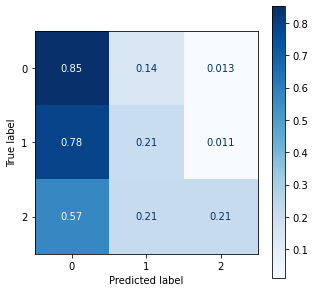

In [49]:
DT_scores["Original fit"] = DT_fitPredict(X_train, y_train)

Accuracy accuracy_score: 82.71 %.

( weighted avg):
Accuracy f1_score: 76.53 %.


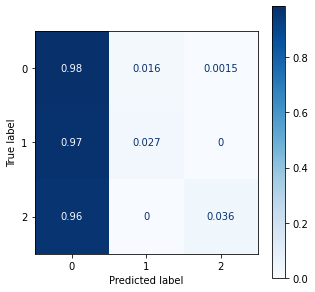

In [50]:
RF_scores["Original fit"] = RF_fitPredict(X_train, y_train)

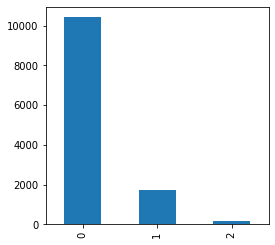

In [51]:
showValueCount(df_final_finale['Accident_severity'])

Accuracy accuracy_score: 72.24 %.

( weighted avg):
Accuracy f1_score: 73.19 %.


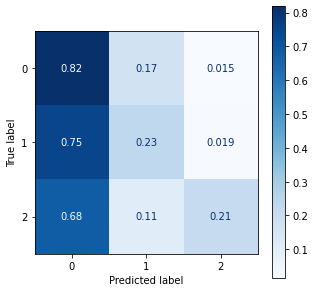

In [52]:
DT_scores["BalancedDT fit"] = BalancedDT_fitPredict(X_train, y_train)

Accuracy accuracy_score: 41.44 %.

( weighted avg):
Accuracy f1_score: 50.71 %.


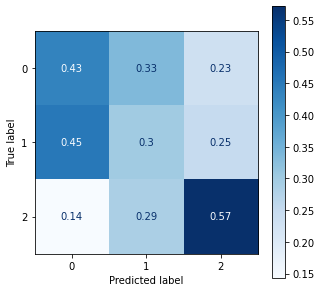

In [53]:
RF_scores["BalancedRF fit"] = BalancedRF_fitPredict(X_train, y_train)

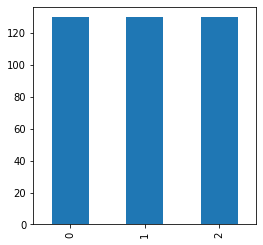

In [54]:
# transform the dataset
undersample = NearMiss()
X_train_US, y_train_US = undersample.fit_resample(X_train, y_train)
showValueCount(y_train_US)

Accuracy accuracy_score: 18.91 %.

( weighted avg):
Accuracy f1_score: 21.7 %.


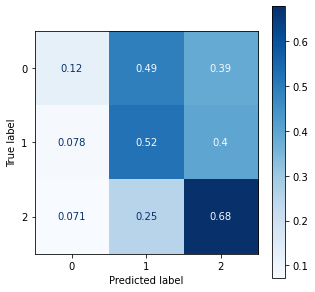

In [55]:
DT_scores["US DT fit"] = DT_fitPredict(X_train_US, y_train_US)

Accuracy accuracy_score: 16.15 %.

( weighted avg):
Accuracy f1_score: 18.07 %.


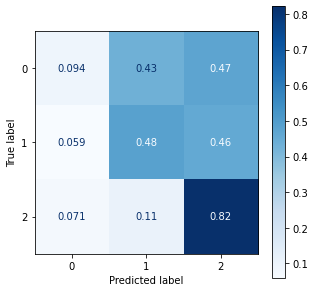

In [56]:
RF_scores["US RF fit"] = RF_fitPredict(X_train_US, y_train_US)

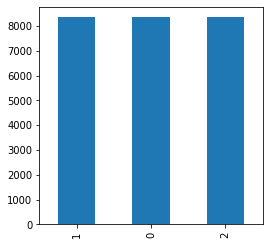

In [57]:
# transform the dataset
oversample = SMOTE()
X_train_OS, y_train_OS = oversample.fit_resample(X_train, y_train)
showValueCount(y_train_OS)

Accuracy accuracy_score: 61.08 %.

( weighted avg):
Accuracy f1_score: 65.78 %.


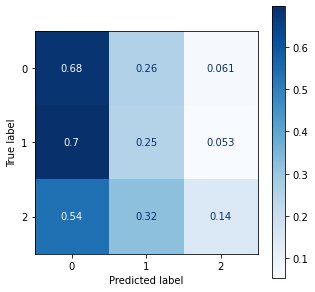

In [58]:
DT_scores["OS DT fit"] = DT_fitPredict(X_train_OS, y_train_OS)

Accuracy accuracy_score: 69.85 %.

( weighted avg):
Accuracy f1_score: 71.09 %.


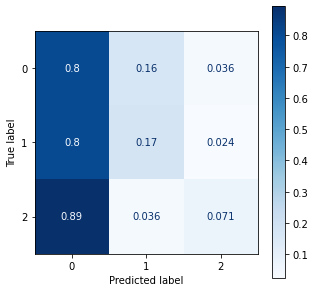

In [59]:
RF_scores["OS RF fit"] = RF_fitPredict(X_train_OS, y_train_OS)

<AxesSubplot:>

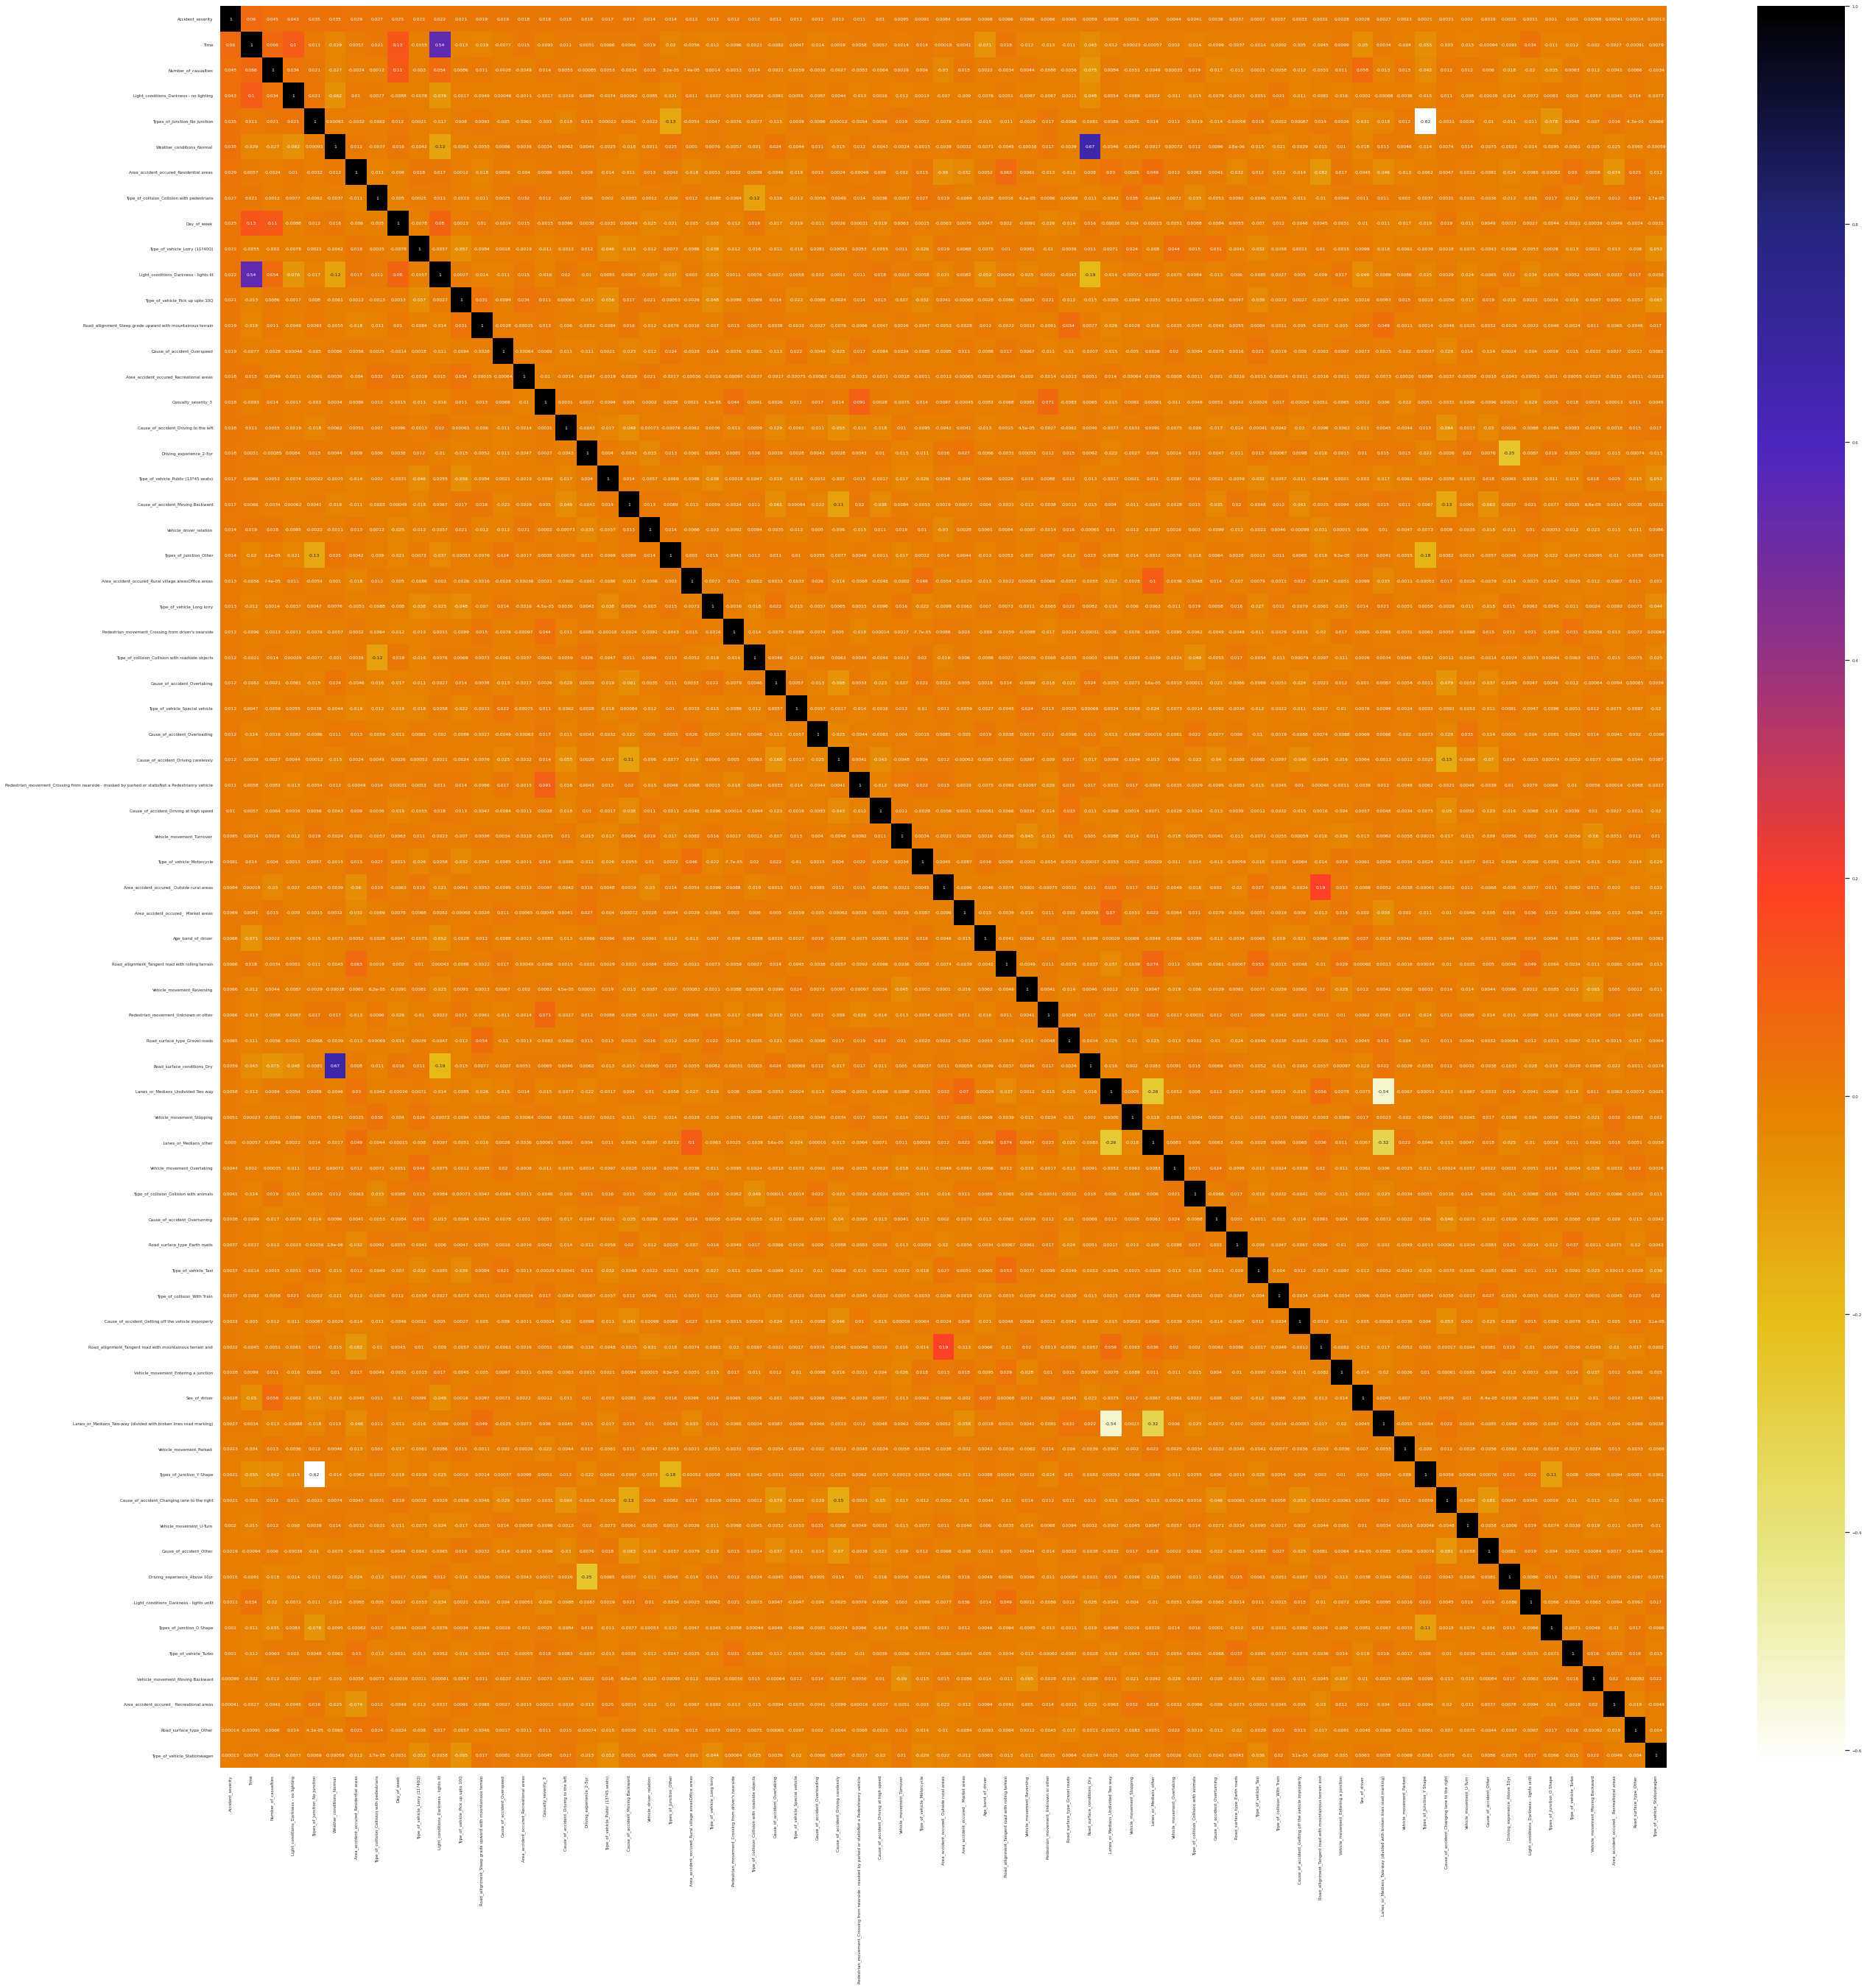

In [60]:
plt.figure(figsize=(44,44))
sns.set(font_scale=0.5)
sns.heatmap(df_final_finale.corr(), annot=True, cmap=plt.cm.CMRmap_r)